In [4]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/Datasets/Market analysis.xlsx')

In [11]:
# 1. Select only the numerical feature columns
# Assuming all columns in selected_df except 'Date' are numerical features
numerical_features = selected_df.select_dtypes(include=np.number).columns.tolist()
selected_features_df = selected_df[numerical_features].copy()

# 2. Import the StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# 3. Instantiate a StandardScaler object
scaler = StandardScaler()

# 4. Fit the scaler to the selected features and transform them
normalized_features = scaler.fit_transform(selected_features_df)

# Store the normalized features in a new DataFrame (or overwrite)
normalized_df = pd.DataFrame(normalized_features, columns=numerical_features, index=selected_features_df.index)

# Optionally, add the 'Date' column back if needed for later steps
normalized_df['Date'] = selected_df['Date']

print("Original features:")
display(selected_features_df.head())
print("\nNormalized features:")
display(normalized_df.head())

Original features:


,Open,High,Low,Close,Adjusted Close,Volume
0,100.500000,102.300000,99.800000,101.700000,101.700000,1.500000e+06
1,153.157971,103.500000,100.200000,102.800000,155.482895,2.714286e+06
2,102.100000,154.950838,101.000000,101.500000,101.500000,1.750000e+06
3,101.800000,104.200000,150.784615,103.700000,103.700000,1.600000e+06
4,103.200000,105.100000,102.500000,154.524752,103.200000,2.714286e+06



Normalized features:


,Open,High,Low,Close,Adjusted Close,Volume,Date
0,-2.321310e+00,-2.091260e+00,-2.190810,-1.973680,-2.315009e+00,-4.307360,2025-01-01
1,-1.252908e-15,-2.043596e+00,-2.173622,-1.932580,-1.223373e-15,0.000000,2025-01-02
2,-2.250777e+00,-1.128893e-15,-2.139246,-1.981152,-2.323618e+00,-3.420551,2025-01-03
3,-2.264002e+00,-2.015793e+00,0.000000,-1.898954,-2.228922e+00,-3.952637,2025-01-04
4,-2.202286e+00,-1.980045e+00,-2.074791,0.000000,-2.250444e+00,0.000000,2025-01-05


In [13]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Based on previous steps, 'Date' is currently the target, which is not suitable for classification.
# However, following the instruction to use the current target, we proceed with 'Date' as 'y'.
# In a real scenario, a valid categorical target column would be needed.
X = normalized_df.drop('Date', axis=1)
y = normalized_df['Adjusted Close'] # Using 'Adjusted Close' as target for regression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (154, 6)
Shape of X_test: (52, 6)
Shape of y_train: (154,)
Shape of y_test: (52,)


In [14]:
from sklearn.neighbors import KNeighborsRegressor # Changed to KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define a range of k values to explore
param_grid = {'n_neighbors': list(range(1, 31))}

# Create a KNeighborsRegressor object
knn = KNeighborsRegressor() # Changed to KNeighborsRegressor

# Create a GridSearchCV object
# Specify scoring='neg_mean_squared_error' for regression
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best k value found by GridSearchCV
print("Best k value:", grid_search.best_params_['n_neighbors'])

Best k value: 1


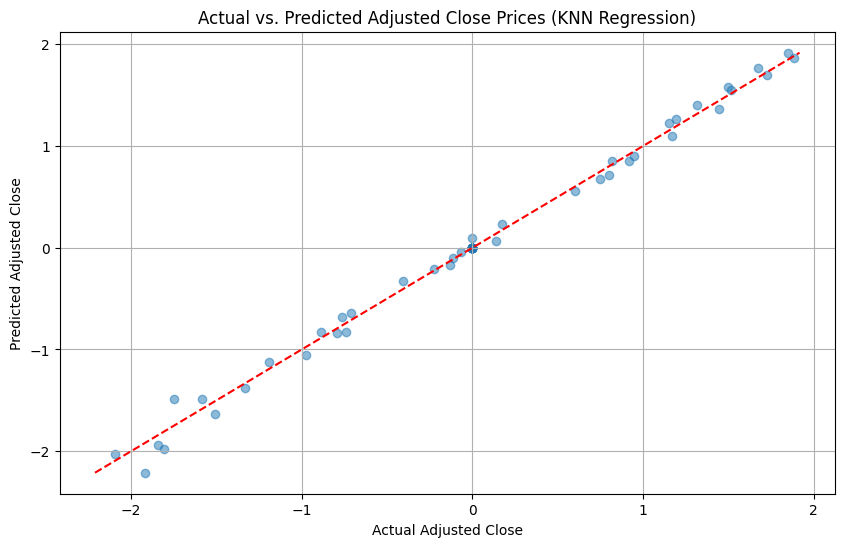

In [15]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Adjusted Close Prices (KNN Regression)')
plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.grid(True)

# Add a line for perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()